# Unsupervised Learning:


# Application - color quantisation



Let's start by importing all the libraries we will use
1. Numpy
2. Matplotlib.pyplot
3. shuffle from sklearn.utils
4. load_sample_image from sklearn.datasets
5. KMeans from sklearn.cluster
6. cv2

In [9]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans
import cv2

array([[[204, 152, 146],
        [205, 153, 147],
        [205, 153, 147],
        ...,
        [194, 143, 123],
        [194, 144, 122],
        [194, 144, 122]],

       [[204, 152, 146],
        [205, 153, 147],
        [205, 153, 147],
        ...,
        [195, 144, 124],
        [195, 145, 123],
        [195, 145, 123]],

       [[202, 152, 146],
        [202, 152, 146],
        [203, 153, 147],
        ...,
        [197, 146, 126],
        [197, 146, 126],
        [197, 146, 126]],

       ...,

       [[ 36,  27,  23],
        [ 38,  29,  25],
        [ 39,  33,  28],
        ...,
        [139, 189, 235],
        [123, 175, 221],
        [118, 168, 214]],

       [[ 28,  22,  15],
        [ 33,  27,  20],
        [ 50,  45,  42],
        ...,
        [ 54,  96, 141],
        [ 97, 139, 184],
        [111, 152, 197]],

       [[ 36,  31,  22],
        [ 29,  26,  18],
        [ 40,  35,  32],
        ...,
        [ 93, 132, 177],
        [ 98, 135, 179],
        [ 65, 102, 146]]], dtype=uint8)
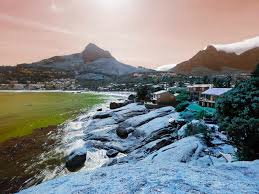

In [10]:
#
flower = cv2.imread('/content/images (1).jpg')
flower

In [11]:
flower.shape

(194, 259, 3)

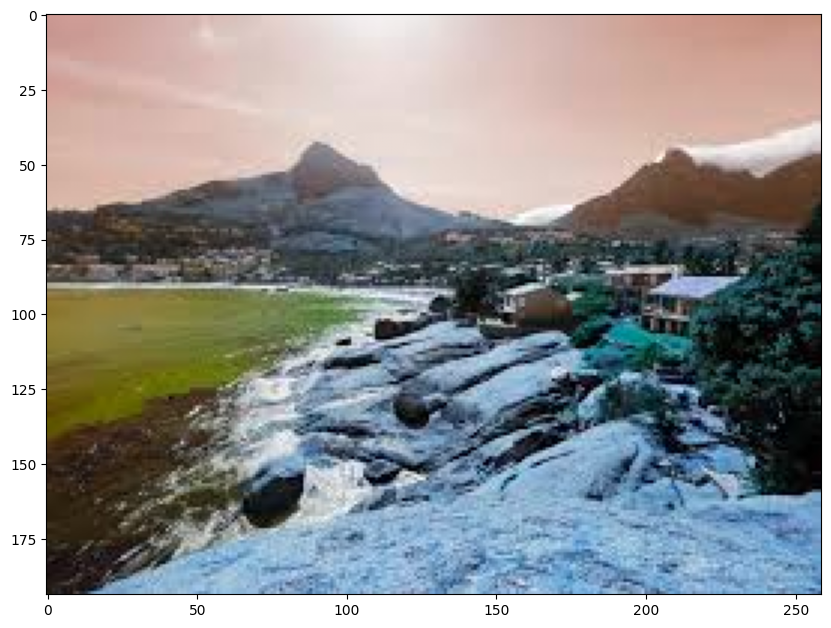

In [12]:
# read in a sample image from sklearn
# flower = load_sample_image('flower.jpg')


flower = np.array(flower, dtype=np.float64) / 255

# display the flower image
plt.figure(figsize=(10, 10))
plt.imshow(flower)

In [13]:
flower

array([[[0.8       , 0.59607843, 0.57254902],
        [0.80392157, 0.6       , 0.57647059],
        [0.80392157, 0.6       , 0.57647059],
        ...,
        [0.76078431, 0.56078431, 0.48235294],
        [0.76078431, 0.56470588, 0.47843137],
        [0.76078431, 0.56470588, 0.47843137]],

       [[0.8       , 0.59607843, 0.57254902],
        [0.80392157, 0.6       , 0.57647059],
        [0.80392157, 0.6       , 0.57647059],
        ...,
        [0.76470588, 0.56470588, 0.48627451],
        [0.76470588, 0.56862745, 0.48235294],
        [0.76470588, 0.56862745, 0.48235294]],

       [[0.79215686, 0.59607843, 0.57254902],
        [0.79215686, 0.59607843, 0.57254902],
        [0.79607843, 0.6       , 0.57647059],
        ...,
        [0.77254902, 0.57254902, 0.49411765],
        [0.77254902, 0.57254902, 0.49411765],
        [0.77254902, 0.57254902, 0.49411765]],

       ...,

       [[0.14117647, 0.10588235, 0.09019608],
        [0.14901961, 0.11372549, 0.09803922],
        [0.15294118, 0

In [14]:
# width, height, and channels/dimensions
w, h, d = original_shape =  tuple(flower.shape) #shape of flower in tuple

# Confirm that image is 3d
assert d == 3

# change the image into a 2-D
image_array = np.reshape(flower, (w * h, d))

In [15]:
# Shuffle the image with random state of 42
image_sample = shuffle(image_array, random_state=42)

#Specify the number of colors you want, initialise, and fit Kmeans on image_sample
n_colors =  2 # specify the number of colors
kmeans = KMeans(n_clusters=n_colors, random_state=42 ) #initialise
kmeans.fit(image_sample)  #fit kmeans

#Get color indices for full image using predict on image_array
labels = kmeans.predict(image_array)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


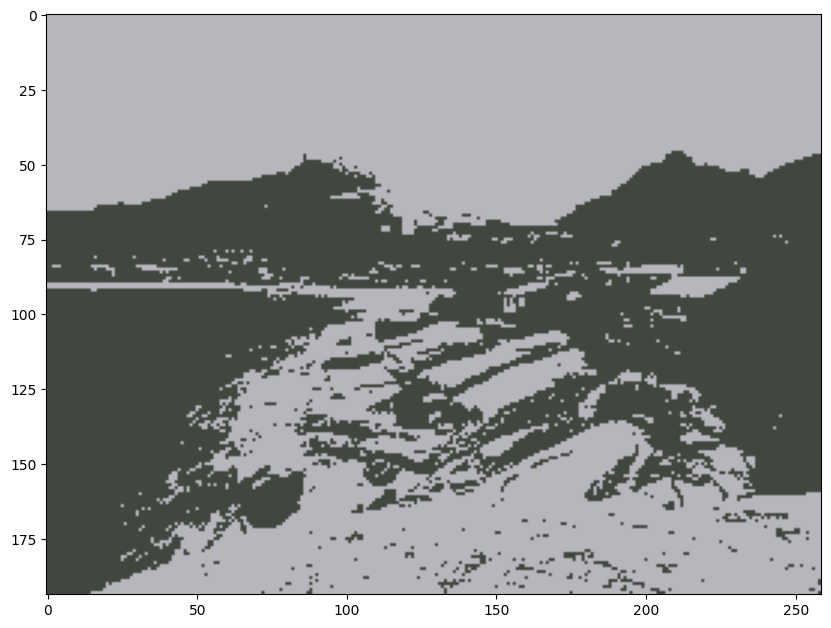

In [16]:
#reconstruct the image
d = kmeans.cluster_centers_.shape[1]
image = np.zeros((w, h, d))

label_index = 0
for i in range(w):
    for j in range(h):
        image[i][j] = kmeans.cluster_centers_[labels[label_index]]
        label_index += 1
        # print(i)
        # print(j)
        # print(label_index)

plt.figure(figsize=(10, 10))
plt.imshow(image)
